# Logarithmic polar plot
## Imports

In [19]:
pwd

'/home/cornelius/Documents/davina'

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab 
%matplotlib inline
print('-----------------------')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Matplotlib backend: {matplotlib.get_backend()}')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
-----------------------
Numpy version: 1.19.2
Pandas version: 1.1.3
Matplotlib version: 3.3.2
Matplotlib backend: module://ipykernel.pylab.backend_inline


## Generate some random data

In [36]:
data = pd.DataFrame(
    [[50.153306734585335,  40.0716653271330472, 10.0780186133820189,],
     [ 10.108073286020673,   8.0709389651370227,  6.0554983367437307,],
     [ 13.084201557914287,   8.9975685657730684,  7.9979217618366352,],
     [243.078018613382018,  96.5685657736133829, 23.8923572901923483,],
     [521.392752904524985, 131.9082735987238572, 71.0982735723499583,],
    ],
    columns = ['0% r.h.',
               '30% r.h.',
               '50% r.h.'],
    index=['CO$_{2}$\n$500\,$ppm',
           'CO\n$150\,$ppm',
           'H$_{2}$\n$150\,$ppm',
           'N$_{2}$\n$150\,$ppm',
           'O$_{2}$\n$300\,$ppm'
          ]
)
# get rid of values lower than 1 -> log scale - had some vaules lower than 1...
data[data < 1] = 1.0
data

,0% r.h.,30% r.h.,50% r.h.
"CO$_{2}$\n$500\,$ppm",50.153307,40.071665,10.078019
"CO\n$150\,$ppm",10.108073,8.070939,6.055498
"H$_{2}$\n$150\,$ppm",13.084202,8.997569,7.997922
"N$_{2}$\n$150\,$ppm",243.078019,96.568566,23.892357
"O$_{2}$\n$300\,$ppm",521.392753,131.908274,71.098274


## The actual plot
### A few words in advance:
This plot is based on "symlog", because i gave up with "log". See "Comparison of log and symlog" for more information. Unfortunately, the default grid isn't usefull in combination with symlog. One reason is, that the "limit circle" of the polar plot, which should fit the r_lim (y_lim), isn't working probably when using the symlog scale. This is maybe caused by the PolarAffine class, but that's just a guess. In addition, the spines are also too long. I think this is caused by the same reasons...
Likewise, the symlog scale has no minor ticks.<br>
Hence, i used the white color and the "ax.spines['polar'].set_visible(False)" to hide the limit circle and the spines. The ticks and spines are later added again and redrawn, but keep in mind that this work-around causes a unintuitive behavior of "ax.set_rlim(1, 1300)". For example if you want to see the 1000 grid line the limit must be set to e.g. 1300. The reason for this is, that the "limit circle" is calculated and drawn, but in white on white :). You also have to set the limit of the spines by hand.<br>
With the min of rlim you can decide if the bullseye is drawn or not:
* ax.set_rlim(1.1, 1350) -> no bullseye
* ax.set_rlim(1.1, 1350) -> bullseye exists, what makes for me personally more sense...

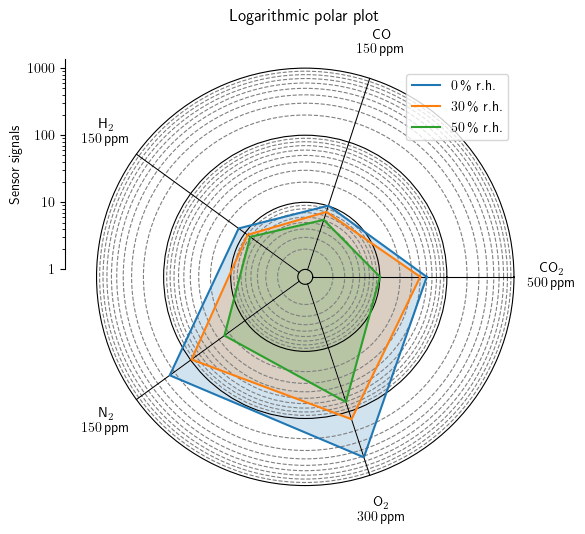

In [37]:
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('grid', color='white')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.15, 0.1, 0.7, 0.7], projection='polar')

# sets the locations of the gas labels more outside
ax.tick_params(pad=10)

# calculates the label positions and angle theta based on data.index.shape[0]. When data.index.shape[0] is a even
#number, a offset of degree_step/2 is added to each label position.
degree_step = 360 / data.index.shape[0]
pi_step = 2*np.pi / data.index.shape[0]
label_positions = []
theta_values = []

if data.index.shape[0] % 2:
    for i in range(data.index.shape[0]):
        label_positions.append(i * degree_step)
        theta_values.append(i * pi_step)
else:
    for i in range(data.index.shape[0]):
        label_positions.append(degree_step / 2 + i * degree_step)
        theta_values.append(np.pi / data.index.shape[0] + i * pi_step)          

# adds theta vaules for ploting and appends the dataframe with the first line to get a full polygone and saves it
# in dataframe df
data['theta'] = theta_values
df = pd.concat([data, data.iloc[0:1]], axis=0)

# sets labels and positions
plt.thetagrids(label_positions, data.index.values, color='black')

# sets the scale to 'symlog' -- I had only problems with ax.set_yscale('log')
#ax.set_rscale('symlog') # does the same as ax.set_yscale('symlog')
ax.set_rscale('symlog', linthresh=1)

# sets the gridlines and labels for ax and ax2. Symlog normally does 10^0, 10^1 ... grid lines, what is to less
# for me. I hard coded this, because i found no easy way to solve this and didn't need so much flexibility 
# in the plots 
my_majorticks = [1, 10, 100, 1000]
my_minorticks = [2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80, 90, 200, 300, 400, 500, 600, 700, 800, 900]

ax.set_yticks(my_majorticks, minor=False)
ax.set_yticks(my_minorticks, minor=True)

ax.yaxis.grid(True, which='major', color='black', linestyle='-') 
ax.yaxis.grid(True, which='minor', color='grey', linestyle='--') 

# no labels in the plot, extra left axis is used...
ax.set_yticklabels([])

#set the y axis limits
# ax.set_rlim(1.1) collapse the bullseye, so if you want this, here is the possibility.
# keep in mind, that symlog and log are only the same if ax.set_rlim >= 1
# i only used 1.1 and 1.0, all different values crashed the plot
ax.set_rlim(1, 1350) # equal to  ax.set_ylim(1.1, 1350) 

# The Hard code, to fit the spines to the highest gird line which you can see...
for value in df['theta']:
    ax.plot([value, value], [1, 1000], lw=0.75, color='black') 

# the plotting code
ax.plot(df['theta'], df['0% r.h.'], label=r'$0\,$\% r.h.')
ax.fill(df['theta'], df['0% r.h.'], alpha=0.2)

ax.plot(df['theta'], df['30% r.h.'], label=r'$30\,$\% r.h.')
ax.fill(df['theta'], df['30% r.h.'], alpha=0.2)

ax.plot(df['theta'], df['50% r.h.'], label=r'$50\,$\% r.h.')
ax.fill(df['theta'], df['50% r.h.'], alpha=0.2)

# adds the legend
ax.legend()

# makes the "limit circle" invisible -> no confusion with a circle line which is no grid line...
ax.spines['polar'].set_visible(False)

# sets the title
ax.set_title(r'Logarithmic polar plot')

# This following code adds the extra left cartesian axis
# X_OFFSET defines how far the axis is away from the plot
X_OFFSET = 0.05

# get the postion of polar plot for ax2
rect = ax.get_position() 

#calculate x, y, width and height of axis 'ax2' depending on 'ax'
rect_lower_display = ax.transData.transform((np.pi/2, ax.get_ylim()[0]))
rect_lower = ax.figure.transFigure.inverted().transform(rect_lower_display)
rect_bottom = rect_lower[1]

rect_upper_display = ax.transData.transform((np.pi/2, ax.get_ylim()[1]))
rect_upper = ax.figure.transFigure.inverted().transform(rect_upper_display)

rect_height = rect_upper[1] - rect_bottom 

rect = (rect.xmin-X_OFFSET, # x
        rect_bottom, # y
        rect.width, # width
        rect_height) # height

# adds the axis
ax2 = ax.figure.add_axes(rect) 
ax2.set_yscale('symlog', linthresh=1)
ax2.set_ylabel(r'Sensor signals')

for loc in ['right', 'top', 'bottom']:
    ax2.spines[loc].set_visible(False)

ax2.tick_params(bottom=False, labelbottom=False)
ax2.patch.set_visible(False) # hide white background
ax2.spines['left'].set_bounds(*ax.get_ylim()) # adjust the scale

ax2.set_yticks(my_majorticks, minor=False) # set majorticks and labels, like polar - depending on 'majorticks'
ax2.set_yticks(my_minorticks, minor=True) # set minorticks and labels, like polar- depending on 'minorticks'
ax2.set_ylim(ax.get_rorigin(), ax.get_rmax())# set lim and max depending on polar 
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())# no scientific written ticks on y axis

plt.savefig('log_polar_plot.pdf', dpi=300)
plt.savefig('log_polar_plot.svg')
plt.show()

## Comparison of log and symlog

In the docstring of the class SymLogNorm is written:<br>

"""<br>
The symmetric logarithmic scale is logarithmic in both the<br>
positive and negative directions from the origin.<br>

Since the values close to zero tend toward infinity, there is a<br>
need to have a range around zero that is linear. The parameter<br>
*linthresh* allows the user to specify the size of this range<br>
(-*linthresh*, *linthresh*).<br>
"""

In addition: 
* The polar plot crashes if you use a value lower than 1.
* I don't wanted to plot data lower than 1 (Values lower than 1 make no sense when plotting with log. Originally log was planed...).


Hence, I used "linthresh=1" in the polar plot. e.g.:

The following plots show the difference between log and symlog and the influence of linthresh. The default of symlog is linscale=1.0, this stretches the linear range relative to the logarithmic range. Its value is the number of powers of base to use for each half of the linear range. Linthresh, which i used, takes a fixed float. Hence, linthresh and negativ linthresh define the points in which the scale changes from logarithmic to linear scale and back again to logarithmic scale. See f(x) = x.

In [23]:
import matplotlib.ticker as ticker
plt.style.use('ggplot')

print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Matplotlib backend: {matplotlib.get_backend()}')

Numpy version: 1.19.2
Pandas version: 1.1.3
Matplotlib version: 3.3.2
Matplotlib backend: module://ipykernel.pylab.backend_inline


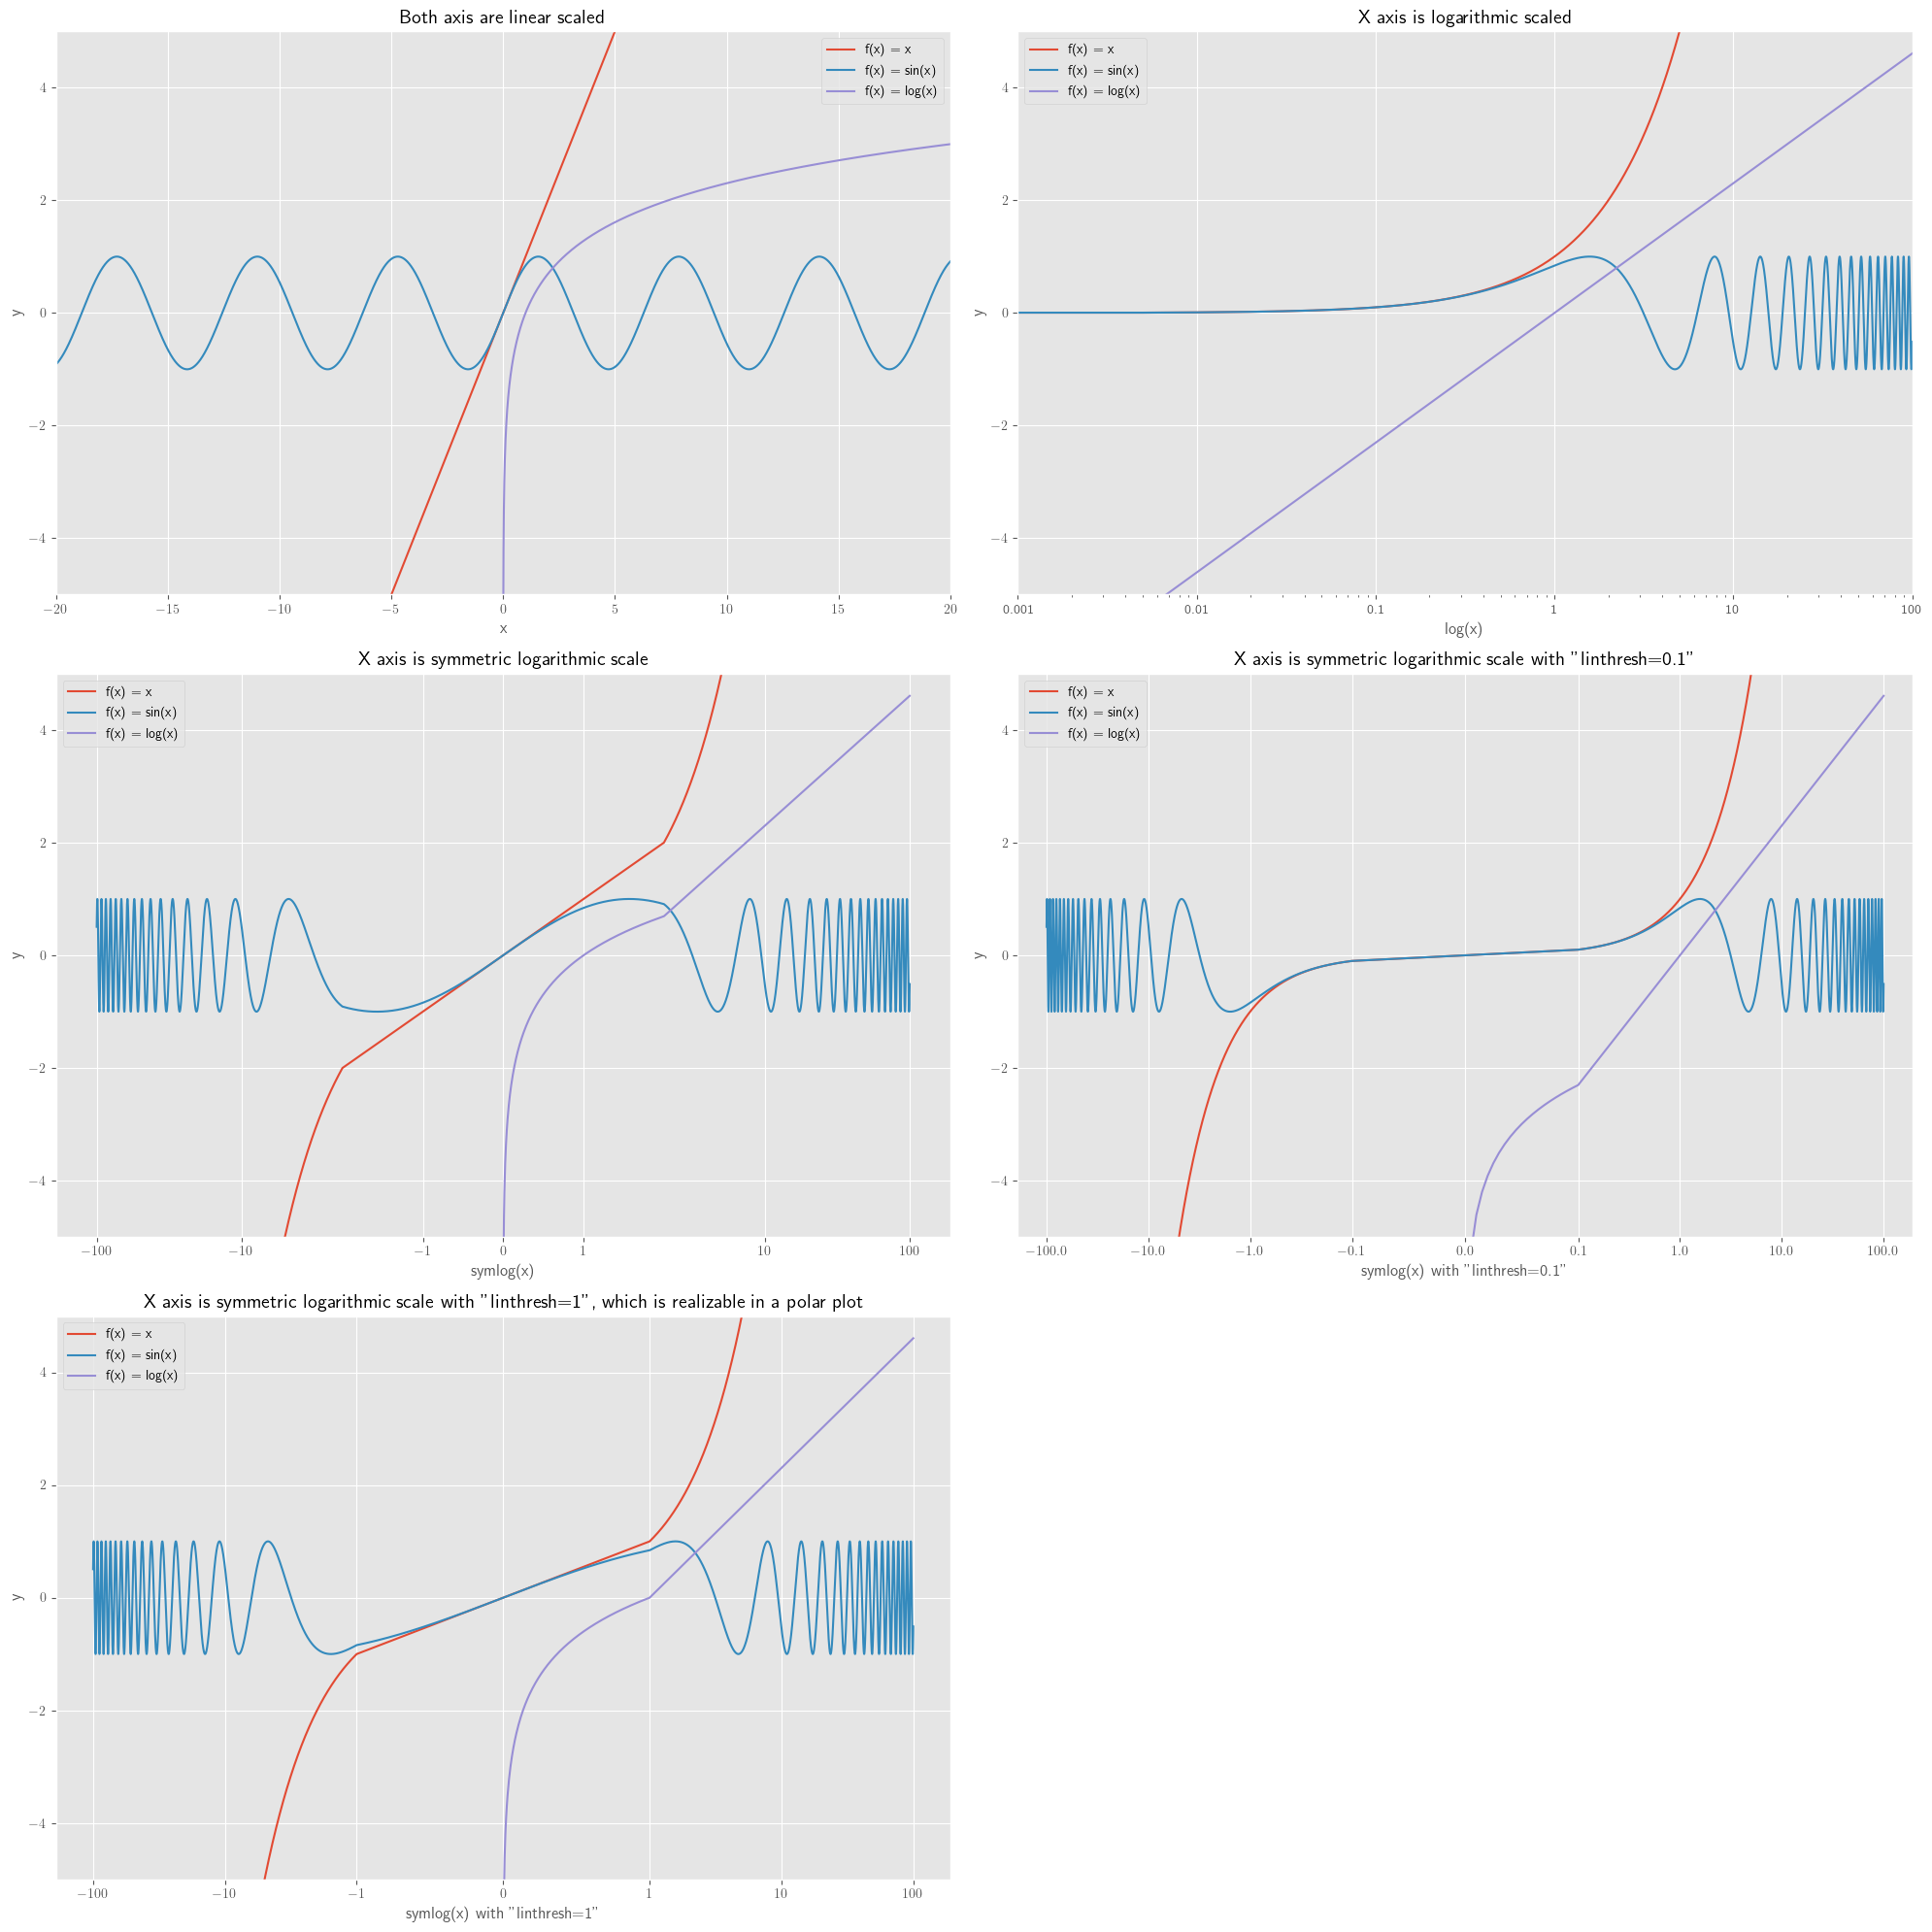

In [24]:
x = np.arange(-100, 100, 0.005)

first_bisector = x
y_sin = np.sin(x)

# numpy don't come up with a warning when log(-x) is calculated, NaNs will appear!
np.seterr(invalid='ignore')
y_log = np.log(x)

fig = plt.figure(figsize=(20,20))
ax0 = fig.add_subplot(3, 2, 1)
ax0.plot(x, first_bisector, label='f(x) = x')
ax0.plot(x, y_sin, label='f(x) = sin(x)')
ax0.plot(x, y_log, label='f(x) = log(x)')
ax0.set(xlabel='x', ylabel='y', title='Both axis are linear scaled', xlim=(-20,20), ylim=(-5, 5))
ax0.legend()

ax1 = fig.add_subplot(3, 2, 2)
ax1.plot(x, first_bisector, label='f(x) = x')
ax1.plot(x, y_sin, label='f(x) = sin(x)')
ax1.plot(x, y_log, label='f(x) = log(x)')
ax1.set(xscale='log', xlabel=r'log(x)', ylabel='y', title='X axis is logarithmic scaled',xlim=(10**(-3),10**(2)), ylim=(-5, 5))
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(x),0)))).format(x)))
ax1.legend()

ax2 = fig.add_subplot(3, 2, 3)
ax2.plot(x, first_bisector, label='f(x) = x')
ax2.plot(x, y_sin, label='f(x) = sin(x)')
ax2.plot(x, y_log, label='f(x) = log(x)')
ax2.set(xscale='symlog', xlabel=r'symlog(x)', ylabel='y', title='X axis is symmetric logarithmic scale', ylim=(ax1.get_ylim()))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())# no scientific written ticks on y axis
ax2.legend()

ax3 = fig.add_subplot(3, 2, 4)
ax3.plot(x, first_bisector, label='f(x) = x')
ax3.plot(x, y_sin, label='f(x) = sin(x)')
ax3.plot(x, y_log, label='f(x) = log(x)')
ax3.set_xscale('symlog', linthresh=0.1)
ax3.set(xlabel=r'symlog(x) with "linthresh=0.1"', ylabel='y', title='X axis is symmetric logarithmic scale with "linthresh=0.1"')
ax3.set_xlim(ax2.get_xlim())
ax3.set_ylim(ax2.get_ylim())
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())# no scientific written ticks on y axis
ax3.legend()

ax4 = fig.add_subplot(3, 2, 5)
ax4.plot(x, first_bisector, label='f(x) = x')
ax4.plot(x, y_sin, label='f(x) = sin(x)')
ax4.plot(x, y_log, label='f(x) = log(x)')
ax4.set_xscale('symlog', linthresh=1)
ax4.set(xlabel=r'symlog(x) with "linthresh=1"', ylabel='y', title='X axis is symmetric logarithmic scale with "linthresh=1", which is realizable in a polar plot')
ax4.set_xlim(ax2.get_xlim())
ax4.set_ylim(ax2.get_ylim())
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())# no scientific written ticks on y axis
ax4.legend()

plt.tight_layout()
plt.savefig('comparison_plot_of_log_vs_symlog.pdf', dpi=300)
plt.show()